In [133]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.colors import LogNorm

%matplotlib inline

In [3]:
# read in data
import csv
import os 
print os.getcwd()
os.chdir('./data')
print os.getcwd()
pts = 10

runs2 = {}
with open('2dtrialsReassembly.csv') as csv_file:
    reader = csv.reader(csv_file)
    runs2 = dict(reader)

/home/likewise-open/WIN/npagane1/bph/gal
/home/likewise-open/WIN/npagane1/bph/gal/data


In [108]:
runs = {}
for i in runs2.keys():
    runs[i] = {}
    tsplit = runs2[i].split("':")
    key = [float(tsplit[0].split("{'")[1])]
    dat = []
    arr = eval(tsplit[1].split("], '")[0].split("]]), ")[1].replace('\n', '').replace('array(', '').replace(')', ''))
    dat = [arr]
    for j in range(1,len(tsplit)-1):
        key.append(float(tsplit[j].split("], '")[1]))
        arr = eval(tsplit[j].split("], '")[0].split("]]), ")[1].replace('\n', '').replace('array(', '').replace(')', ''))
        dat.append(arr)
    for j in range(len(key)):
        runs[i][key[j]] = [dat[j]]
    

In [119]:
avgEVec = np.zeros([pts, pts])
avgNVec = np.zeros([pts, pts])
pkeys = np.sort(np.asarray(runs.keys()))
tkeys = np.sort(np.asarray(runs[pkeys[0]].keys()))
pVec = []
tVec = []
for i in range(len(pkeys)):
    for j in range(len(tkeys)):
        avgEVec[i, j] = np.mean(runs[pkeys[i]][tkeys[j]][0][0])
        avgNVec[i, j] = np.mean(runs[pkeys[i]][tkeys[j]][0][1])
        pVec.append(float(pkeys[i])); tVec.append(float(tkeys[j]))

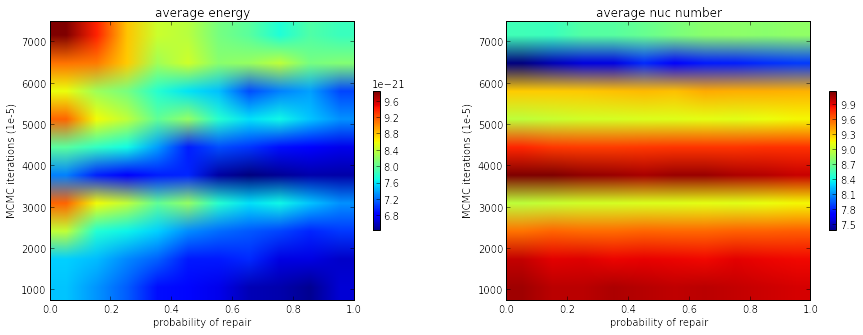

In [131]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(121)

ax = fig.add_subplot(121)
surf = ax.imshow(avgEVec.T, cmap = 'jet', origin = 'lower', aspect = 'auto',
                extent = (pVec[0], pVec[-1], tVec[0], tVec[-1]))
fig.colorbar(surf, shrink = 0.5)
ax.set_title('average energy')
ax.set_xlabel('probability of repair'); ax.set_ylabel('MCMC iterations (1e-5)')

ax = fig.add_subplot(122)
surf = ax.imshow(avgNVec.T, cmap = 'jet', origin = 'lower', aspect = 'auto',
                extent = (pVec[0], pVec[-1], tVec[0], tVec[-1]))
fig.colorbar(surf, shrink = 0.5)
ax.set_title('average nuc number')
ax.set_xlabel('probability of repair'); ax.set_ylabel('MCMC iterations (1e-5)')

plt.show()

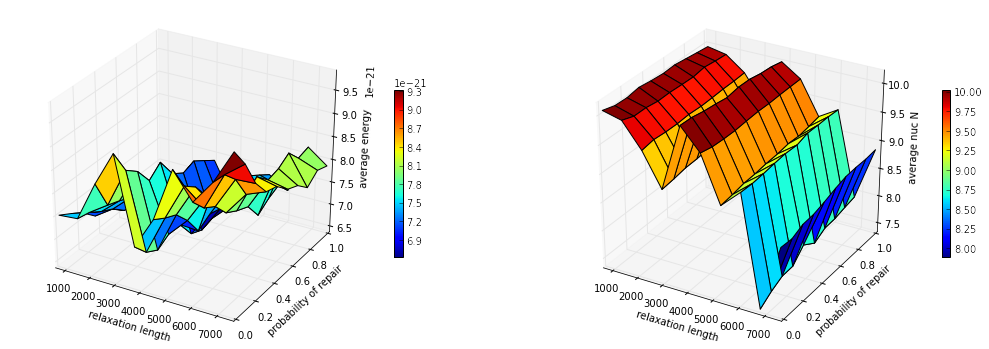

In [134]:
# 3D PLOTTING 
# of energy by prob and rate
fig = plt.figure(figsize = (18,6))

ax = fig.add_subplot(121,projection = '3d')

#surf = ax.scatter(tVec, pVec, avgEVec, s= 100, c = avgNVec, cmap= 'jet')
surf = ax.plot_surface(tVec, pVec, avgEVec, cstride = 1, rstride = 1, cmap= 'jet'); 
fig.colorbar(surf, shrink = 0.5)

ax.set_ylabel('probability of repair'); ax.set_xlabel('relaxation length'); ax.set_zlabel('average energy')

ax = fig.add_subplot(122,projection = '3d')

#surf = ax.scatter(tVec, pVec, avgNVec, s= 100, c = avgNVec, cmap= 'jet')
surf = ax.plot_surface(tVec, pVec, avgNVec, cstride = 1, rstride = 1, cmap= 'jet'); 
fig.colorbar(surf, shrink = 0.5)

ax.set_ylabel('probability of repair'); ax.set_xlabel('relaxation length'); ax.set_zlabel('average nuc N')

plt.show()